In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

In [5]:
import pandas as pd

try:
    df = pd.read_csv("C:\\Users\\VikA\\Desktop\\интенсив4\\categorized_comments_utf8.csv", sep=';')  # Например, разделитель - точка с запятой
    print(df.head()) # или df.info()
except pd.errors.ParserError as e:
    print(f"Ошибка при чтении CSV: {e}")


  Вопрос решен\tВопрос не решен \tНравится качество выполнения заявки\tНравится качество работы сотрудников\tНравится скорость отработки заявок\tПонравилось выполнение заявки\tUnnamed: 6\tUnnamed: 7\tUnnamed: 8
0                            \t\t\t\t\tспасибо\t\t\t                                                                                                                                                              
1                           \t\t\t\t\tспасибо!\t\t\t                                                                                                                                                              
2                           \t\t\t\t\tОтлично \t\t\t                                                                                                                                                              
3  \t\tБлагодарю за оперативное решение проблемы ...                                                                                                        

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2245 entries, 0 to 2244
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                    --------------  ----- 
 0   Вопрос решен	Вопрос не решен 	Нравится качество выполнения заявки	Нравится качество работы сотрудников	Нравится скорость отработки заявок	Понравилось выполнение заявки	Unnamed: 6	Unnamed: 7	Unnamed: 8  2245 non-null   object
dtypes: object(1)
memory usage: 17.7+ KB


c:\Users\VikA\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()


<Axes: >

C:\Users\VikA\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\VikA\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


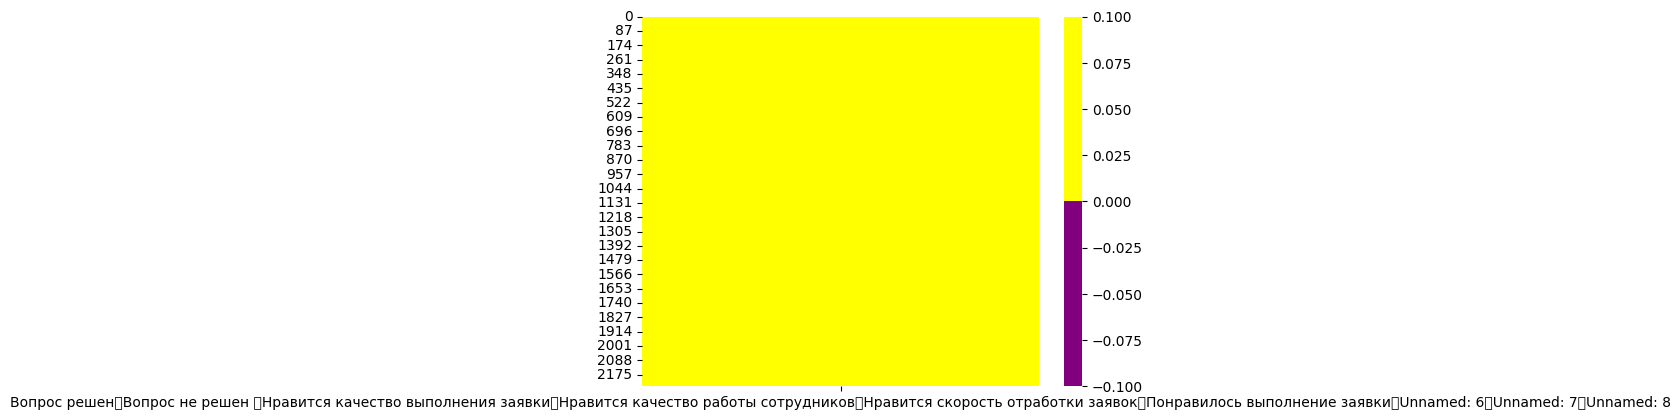

In [7]:
cols = df.columns[:30] # первые 30 колонок
# определяем цвета 
# желтый - пропущенные данные, фиолетовый- не пропущенные
colours = ['#800080', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [8]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Вопрос решен	Вопрос не решен 	Нравится качество выполнения заявки	Нравится качество работы сотрудников	Нравится скорость отработки заявок	Понравилось выполнение заявки	Unnamed: 6	Unnamed: 7	Unnamed: 8 - 0%


In [9]:
df.head()

,Вопрос решен\tВопрос не решен \tНравится качество выполнения заявки\tНравится качество работы сотрудников\tНравится скорость отработки заявок\tПонравилось выполнение заявки\tUnnamed: 6\tUnnamed: 7\tUnnamed: 8
0,\t\t\t\t\tспасибо\t\t\t
1,\t\t\t\t\tспасибо!\t\t\t
2,\t\t\t\t\tОтлично \t\t\t
3,\t\tБлагодарю за оперативное решение проблемы ...
4,\t\t\tПрекрасный специалист! Побольше таких\t\...


c:\Users\VikA\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()


<Axes: >

C:\Users\VikA\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\VikA\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


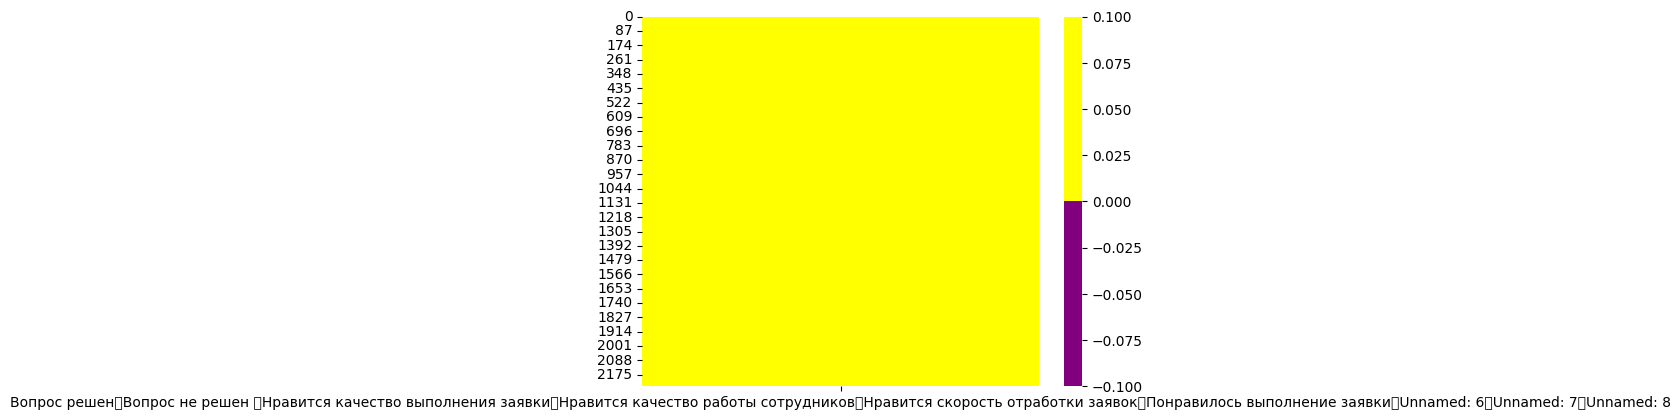

In [10]:
cols = df.columns[:30] # первые 30 колонок
# определяем цвета 
# желтый - пропущенные данные, фиолетовый - не пропущенные
colours = ['#800080', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [11]:
import pandas as pd
import re

# Загрузка данных из CSV-файла
df = pd.read_csv('categorized_comments_utf8.csv', sep='\t', encoding='utf-8')

# Удаление дубликатов
df = df.drop_duplicates()

# Функция для удаления эмодзи
def remove_emojis(text):
    if isinstance(text, str):
        # Паттерн для поиска эмодзи
        emoji_pattern = re.compile("["
                                u"\U0001F600-\U0001F64F"  # эмоции
                                u"\U0001F300-\U0001F5FF"  # символы и пиктограммы
                                u"\U0001F680-\U0001F6FF"  # транспорт и карты
                                u"\U0001F1E0-\U0001F1FF"  # флаги
                                u"\U00002500-\U00002BEF"  # символы
                                u"\U00002702-\U000027B0"
                                u"\U00002702-\U000027B0"
                                u"\U000024C2-\U0001F251"
                                u"\U0001f926-\U0001f937"
                                u"\U00010000-\U0010ffff"
                                u"\u2640-\u2642"
                                u"\u2600-\u2B55"
                                u"\u200d"
                                u"\u23cf"
                                u"\u23e9"
                                u"\u231a"
                                u"\ufe0f"  # вариационные селекторы
                                u"\u3030"
                                "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)
    return text

# Применение функции ко всем столбцам типа object (строки)
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].apply(remove_emojis)

# Сохранение очищенных данных обратно в CSV-файл
df.to_csv('cleaned_comments.csv', index=False, encoding='utf-8', sep='\t')

print("Очистка завершена. Результат сохранён в файл 'cleaned_comments.csv'.")

Очистка завершена. Результат сохранён в файл 'cleaned_comments.csv'.


In [12]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Вопрос решен - 90%
Вопрос не решен  - 90%
Нравится качество выполнения заявки - 75%
Нравится качество работы сотрудников - 77%
Нравится скорость отработки заявок - 68%
Понравилось выполнение заявки - 81%
Unnamed: 6 - 100%
Unnamed: 7 - 100%
Unnamed: 8 - 100%


In [14]:
df.to_csv('готовые_данные')